##Luis David Pardo Pedraza

##Resale Price Estimation of Flats in Singapore: A Machine Learning Perspective

Fictional case study. Main focus on building an end-to-end Machine Learning predictive pipeline.

##Business problem

This notebook aims to provide useful insights to a new entrant company in the real estate market of Singapore called NewHouse Investments. By leveraging historical sales data and property attributes the study wants to build a model that gives valuable information for future investments. This model will help the company to understand the market and make informed decisions about purchasing real estate across various towns in Singapore.

The main idea is to build a machine learning predictive model that can estimate the resale price of a property listed on the market based on various features of the flats such as location, size, and type of the flat.  

##Import relevant libraries

In this step all the libraries that are used are imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

##Data collection

For obtaining relevant data, I am consulting a couple of datasets originally provided by the Housing Development Board, a statutory board under the Ministry of National Development of Singapore.

The first dataset contains valuable information of flats sold between 2015 and 2016. The second dataset has the same kind of information but from 2017 onwards. The idea is to combine both datasets to get a bigger one with the information from 2015 onwards.

The original datasets can be found in the following link:

https://www.kaggle.com/datasets/syrahmadi/resale-hdb-flat-prices-2000-2022?select=ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv

###Accessing and loading the data

In order to access and load the data, the following steps are performed:

1. Click the link of the dataset
2. Select "resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv" dataset
3. Download the dataset to my computer
4. Upload the dataset to the File Explorer specifically to the "content/sample_data" directory.
5. Assign the path of the dataset to a variable "file_path_1"
6. Use the "read_csv()" function of pandas to read the dataset.
7. Assign the new DataFrame to a variable "data_1".
8. Repeat the same steps for reading the file "ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv" but creating variables "file_path_2" and "data_2" instead.

In [2]:
file_path_1 = r"C:\Users\luisd\OneDrive\Desktop\Python_projects\Datasets\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv"

data_1 = pd.read_csv(file_path_1)

file_path_2 = r"C:\Users\luisd\OneDrive\Desktop\Python_projects\Datasets\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"

data_2 = pd.read_csv(file_path_2)

###Combining the datasets

In [3]:
data_1.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0


In [4]:
data_2.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0


For combining the dataset I am conducting an initial visualization of each dataset. As can be seen they both share the same columns. However, it seems that the column "remaining_lease" has numerical values in the first dataset while it has string values in the second dataset. If this is the case, this issue must be solved before combining the datasets.

To verify this I am checking the data type for this column specifically.

In [5]:
data_1["remaining_lease"].dtype

dtype('int64')

In [6]:
data_2["remaining_lease"].dtype

dtype('O')

With these results it is evident that the data type for remaining lease is different between the two datasets. For solving this I am converting the data type of remaining_lease from "data_2" to integer data.

For doing so, I extract the numeric part of the string values and then I replace the original column with a new column that has as values the extracted numbers for each entry.

In [7]:
data_2["remaining_lease"] = data_2["remaining_lease"].str.extract(r'(\d+)').astype(int)

Now I can proceed to combine the two datasets creating a new one called "data". For doing so I put the entries of the second dataset below the entries of the first dataset with the function .concat(). This combines the two DataFrames along one of the axes. With ignore=index=True the index of the dataset will have a new integer index that starts from 0 to the total number of rows in the combined DataFrame.








In [8]:
data = pd.concat([data_1, data_2], ignore_index=True)

##Data exploration

###Data shape and general information

To explore the new dataset, I begin by addressing its size and shape:

With "data.shape" the form of the dataset is described giving the number of rows and columns in it.

Using "print()" allows to display inputs of the function. In this case a title text "Shape of the Dataframe:" and the actual shape.

In [9]:
print("Shape of the Dataframe:", data.shape)

Shape of the Dataframe: (206737, 11)


As can be observed, the new dataset has 206737 rows and 11 columns. Now let's examine the headers of the columns and their data type.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206737 entries, 0 to 206736
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                206737 non-null  object 
 1   town                 206737 non-null  object 
 2   flat_type            206737 non-null  object 
 3   block                206737 non-null  object 
 4   street_name          206737 non-null  object 
 5   storey_range         206737 non-null  object 
 6   floor_area_sqm       206737 non-null  float64
 7   flat_model           206737 non-null  object 
 8   lease_commence_date  206737 non-null  int64  
 9   remaining_lease      206737 non-null  int64  
 10  resale_price         206737 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 17.4+ MB


According to the information above the dataset provides the following information of the Singaporean real estate market:

1. Month when the property was sold
2. Town where the property is
3. Type of the flat
4. Block number of the building where the property is located
5. Name of the street where the property is situated
6. Range of storeys in which the property is located
7. Floor area of the property in square meters
8. Model or layout of the flat
9. Year in which the lease of the property commenced
10. Remaining lease tenure of the property in years
11. Resale price of the property

Additionally, the table states that the columns floor_area_sqm, lease_commence_date, remaining_lease and resale_price are the only ones that have numerical values. The rest of the columns have object type data. This means that these last columns probably are categorical variables.

Also, since all the columns has the same number of non-missing values as the total number of entries it can said that there are not missing values.

##Data cleaning and preprocessing

For this part some aspects of the data quality are discussed:

1. Sample size
2. Missing values
3. Duplicates

###1. Sample size

At the begining of the notebook it was stated that, for this study, the dataset that is used is the combination of two smaller datasets. The reason for combining the two into just one bigger dataset is that with more data, machine learning models can reach better performance in prediction which is the main objective of this study. "Having more data is always a good idea. It allows the “data to tell for itself” instead of relying on assumptions and weak correlations. Presence of more data results in better and more accurate machine-learning models" (Ray S., 2024).

###2. Missing values

In the data exploration step it was evident that there are not missing values in this dataset. However, let's conduct a brief count of the missing values in all the dataset with the ".isna().sum().sum()". If the result is 0 it means that there are not null values in the dataset.

In [11]:
print("Number of missing values:")

data.isna().sum().sum()

Number of missing values:


0

###3. Duplicate values

To avoid bias and ambiguity it is important to check if the dataset has duplicated values. For this the function ".duplicated()" is used on the DataFrame. Basically, this returns for each row a True or False value wether it finds a duplicated row or not. Then a DataFrame with only the rows with True values is created and finally the shape of this DataFrame is printed to see how many duplicated values are.

In [12]:
duplicates = data.duplicated()
duplicated_rows = data[duplicates]
print("Shape of the Dataframe of duplicated rows:", duplicated_rows.shape)

Shape of the Dataframe of duplicated rows: (366, 11)


Since there are 366 duplicated rows in the dataset, it is important to remove them in order to clean the dataset.

In [13]:
data = data.drop_duplicates()
#Verify the shape of the DataFrame after removing duplicates
print("Shape of the Dataframe after removing duplicates:", data.shape)

Shape of the Dataframe after removing duplicates: (206371, 11)


##Split the data into training, validation and test sets

The data is split. 20% of it is for testing while the remaining 80% is for training and validation. A second split is generated with 20% of the remaining 80% for validation (which means 16% of the total dataset) and 64% for training. A random_state value is fixed to ensure reproducibility, meaning that the same split will be generated each time the code is run. Making the split now helps to avoid data lekeage in further steps.

In [14]:
train_val, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.2, random_state=42)
print("Train set shape:", train.shape)
print("Validation set shape:", val.shape)
print("Test set shape:", test.shape)

Train set shape: (132076, 11)
Validation set shape: (33020, 11)
Test set shape: (41275, 11)


###Exploration of numerical data

####Statistical analysis

Now let's conduct an initial statistical analysis on the numerical columns. For this, the function "describe()" is used on the DataFrame. This shows basic statistical information of only the numerical columns of the dataset. Basically, it shows the number of entries, the mean, standard deviation, minimum value, 25th percentile, 50th percentile (known as median), 75th percentile and maximum value.
Also, the function is followed by ".T" which transposes the table making it easier to read.

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,132076.0,97.294662,24.070588,31.0,82.0,94.0,112.0,280.0
lease_commence_date,132076.0,1994.992095,13.568252,1966.0,1984.0,1995.0,2004.0,2020.0
remaining_lease,132076.0,74.181570,13.355385,42.0,63.0,74.0,85.0,97.0
resale_price,132076.0,481729.406124,165677.027413,140000.0,360000.0,450000.0,570000.0,1500000.0


This information provides the first approach to the target variable of this study which is resale_price. It is clear that the average price for a flat in Singapore is around 481000 Singaporean Dollars (SD) with a standard deviation of approximately SD 165677. Also, The lowest resale price observed in the dataset is SD140000, while the highest resale price is SD1500000.

Additionally, it can be observed that the size of the flats is in average 97 square meters and oscillates between a minimum value of 31 square meters and a maximum value of 280 square meters.

Regarding leasing agreements it can be seen that on average people still have 74 years of remaining tenure of the flats and that the earliest date of leasing is the year 1966.

####Correlation analysis

Now let's see how these numerical variables behave in relation with the target variable. For this part a correlation matrix is build.

In [16]:
print("Correlation Matrix:")

#Making a correlation matrix with the desired columns and visualizing as a heatmap (warmer color means high correlation)
train[["resale_price", "floor_area_sqm", "lease_commence_date", "remaining_lease"]].corr().style.background_gradient(cmap='coolwarm')

Correlation Matrix:


,resale_price,floor_area_sqm,lease_commence_date,remaining_lease
resale_price,1.000000,0.605181,0.375576,0.328490
floor_area_sqm,0.605181,1.000000,0.158511,0.164964
lease_commence_date,0.375576,0.158511,1.000000,0.982032
remaining_lease,0.328490,0.164964,0.982032,1.000000


According to the matrix, floor_area_sqm has a moderately strong positive correlation with the target variable resale_price. This is because, their correlation value is 0.605 which is closer to 1 than to 0.

Moreover, both remaining_lease and lease_commence_date have a correlation value with resale_price bigger than 0.3. This indicates the presence of a moderate positive correlation with the target variable.

To summarize this information suggests that the resale price of a flat is moderately affected by the size of it (in square meters) and in a lesser degree by its leasing time conditions.

####Distribution of the target variable

Now let's figure out how is seen the distribution of the target variable. For this, a histogram is constructed. However since the values of resale_price are so big I am creating a new variable that stores the same values but divided by 1000

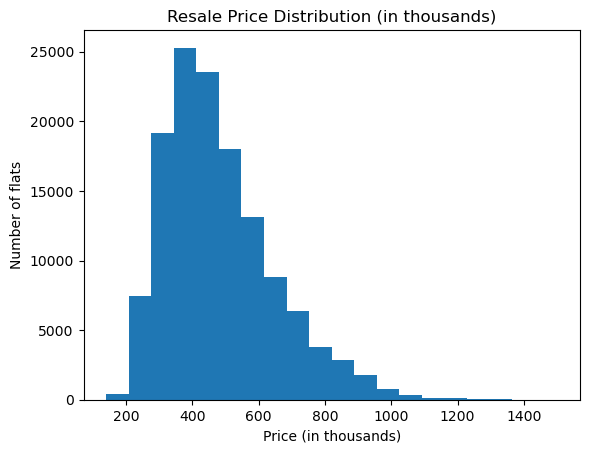

In [17]:
#Divide resale prices by 1000
resale_price_thousands = train["resale_price"] / 1000

#Plot histogram with resale prices divided by 1000
plt.hist(resale_price_thousands, bins=20)
plt.title("Resale Price Distribution (in thousands)")
plt.xlabel("Price (in thousands)")
plt.ylabel("Number of flats")
plt.show()

##Feature Engineering

In [18]:
print(train.columns.tolist())

['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']


For this step all the variables with object type data present in the dataset must be converted or encoded into a format that is suitable for modeling. The variables that need feature engineering in this case are:

month,	town,	flat_type,	block,	street_name,	storey_range and flat_model

It is important to note that the original columns are deleted in the dataset after the encoding process.

###month

This variable can be converted to datetime data type to then be converted to years.

In [19]:
for df in [train, val, test]:
    df["month"] = pd.to_datetime(df["month"])
    df["year"] = df["month"].dt.year
    df.drop("month", axis=1, inplace=True)

###Other string variables

For deciding which encoding approach is better for the other variables the values present in each column are explored by doing a frequency tests.

In [20]:
town_values = train["town"].value_counts()
flat_type_values = train["flat_type"].value_counts()
block_values = train["block"].value_counts()
street_name_values = train["street_name"].value_counts()
storey_range_values = train["storey_range"].value_counts()
flat_model_values = train["flat_model"].value_counts()

In [21]:
print(town_values)

SENGKANG           10733
WOODLANDS           9314
PUNGGOL             9071
JURONG WEST         8941
TAMPINES            8906
YISHUN              8839
BEDOK               7360
HOUGANG             6617
CHOA CHU KANG       6051
ANG MO KIO          5709
BUKIT MERAH         4969
BUKIT BATOK         4960
BUKIT PANJANG       4947
TOA PAYOH           4149
PASIR RIS           3998
KALLANG/WHAMPOA     3994
QUEENSTOWN          3671
SEMBAWANG           3503
GEYLANG             3330
CLEMENTI            3065
JURONG EAST         2760
SERANGOON           2488
BISHAN              2424
CENTRAL AREA        1148
MARINE PARADE        803
BUKIT TIMAH          326
Name: town, dtype: int64


In [22]:
print(flat_type_values)

4 ROOM              55267
5 ROOM              32707
3 ROOM              31943
EXECUTIVE           10014
2 ROOM               2045
MULTI-GENERATION       53
1 ROOM                 47
Name: flat_type, dtype: int64


In [23]:
print(block_values)

2       455
1       392
8       388
9       377
101     361
       ... 
860B      1
226F      1
223B      1
828A      1
42A       1
Name: block, Length: 2696, dtype: int64


In [24]:
print(street_name_values)

YISHUN RING RD        2023
BEDOK RESERVOIR RD    1482
PUNGGOL DR            1362
ANG MO KIO AVE 10     1360
PUNGGOL FIELD         1275
                      ... 
SENG POH RD              5
KRETA AYER RD            5
YISHUN ST 43             4
SEMBAWANG WAY            3
GEYLANG EAST AVE 2       1
Name: street_name, Length: 564, dtype: int64


In [25]:
print(storey_range_values)

04 TO 06    30739
07 TO 09    27897
10 TO 12    24781
01 TO 03    23696
13 TO 15    12292
16 TO 18     5658
19 TO 21     2394
22 TO 24     1787
25 TO 27     1031
28 TO 30      653
31 TO 33      347
34 TO 36      307
37 TO 39      270
40 TO 42      139
43 TO 45       45
46 TO 48       32
49 TO 51        8
Name: storey_range, dtype: int64


In [26]:
print(flat_model_values)

Model A                   44445
Improved                  32822
New Generation            17544
Premium Apartment         14596
Simplified                 5365
Apartment                  5044
Maisonette                 3749
Standard                   3740
DBSS                       1984
Model A2                   1604
Type S1                     267
Model A-Maisonette          266
Adjoined flat               233
Type S2                     126
Terrace                      78
Premium Apartment Loft       71
Multi Generation             53
2-room                       44
Improved-Maisonette          20
3Gen                         17
Premium Maisonette            8
Name: flat_model, dtype: int64


####Label encoding

Since the variable storey_range is an ordinal categorical variable, the label encoding technique is appropriate for it. Here a column with integer values is created. It starts by assigning 0 to the first category and then it applies 1 to the second and so on.

In [27]:
#LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(train["storey_range"])
for df in [train, val, test]:
    df["storey_range_encoded"] = label_encoder.transform(df["storey_range"])
    df.drop("storey_range", axis=1, inplace=True)

####One-hot encoding

For the variables town, flat_type and flat_model the One-hot encoding technique is used. In this case new columns are created for every category in the original columns. A value of 1 is assigned to the rows that fall into a category and a value of 0 in the opposite case.

In [28]:
#One-hot encode on the training data
train_encoded = pd.get_dummies(train, columns=["town", "flat_type", "flat_model"], drop_first=True)
encoded_columns = train_encoded.columns

#Now on the validation and test data
val_encoded = pd.get_dummies(val, columns=["town", "flat_type", "flat_model"], drop_first=True)
test_encoded = pd.get_dummies(test, columns=["town", "flat_type", "flat_model"], drop_first=True)

#Then I rearenge the index of validation and test sets
val_encoded = val_encoded.reindex(columns=encoded_columns, fill_value=0)
test_encoded = test_encoded.reindex(columns=encoded_columns, fill_value=0)

####Frequency encoding

Since the variables block and street_name have too many different values I prefer a different approach from One-hot encoding. In this case the frequency encoding technique is used. Here a new column is created for each variable. These new columns have as values the frequency values that each category had in their original columns.

In [29]:
block_freq = train_encoded['block'].value_counts(normalize=True)
street_freq = train_encoded['street_name'].value_counts(normalize=True)

for df in [train_encoded, val_encoded, test_encoded]:
    df['block_frequency_encoded'] = df['block'].map(block_freq)
    df['street_frequency_encoded'] = df['street_name'].map(street_freq)
    df.drop(['block', 'street_name'], axis=1, inplace=True, errors='ignore')

####Remove empty cells after feature engineering

In [30]:
for df in [val_encoded, test_encoded]:
    df['block_frequency_encoded'].fillna(0, inplace=True)
    df['street_frequency_encoded'].fillna(0, inplace=True)

In [31]:
print("Non-numeric columns in train:", train_encoded.select_dtypes(include='object').columns.tolist())
print("Non-numeric columns in val:", val_encoded.select_dtypes(include='object').columns.tolist())
print("Non-numeric columns in test:", test_encoded.select_dtypes(include='object').columns.tolist())

Non-numeric columns in train: []
Non-numeric columns in val: []
Non-numeric columns in test: []


##Model training

For this step I will train with three different algorithms and choose the best one. The selected algorithms are Linear Regression, Decision Tree and Random Forest.

###1. Split the data into features (X) and target variable (y)

In this step the target variable resale_price is dropped and then stored in a variable "y". The rest of the dataset is stored in variable "X". This applies for training, validation and test sets.

In [32]:
X_train = train_encoded.drop("resale_price", axis=1)
y_train = train_encoded["resale_price"]

X_val = val_encoded.drop("resale_price", axis=1)
y_val = val_encoded["resale_price"]

X_test = test_encoded.drop("resale_price", axis=1)
y_test = test_encoded["resale_price"]

###2. Training models and selecting the best one

Here the Linear Regression, Decision Tree and Random Forest models are trained and compared with the Mean Squared Error measure on the validation set. The smaller the MSE of a model the better.

####Linear Regression

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Initial evaluation
y_pred_lr = lr_model.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)
print("Linear Regression - MSE on validation set:", mse_lr)

Linear Regression - MSE on validation set: 4239216886.1862693


####Decision Tree

In [34]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

mse_dt = mean_squared_error(y_val, y_pred_dt)
print("Decision Tree - MSE on validation set:", mse_dt)

Decision Tree - MSE on validation set: 1739793724.204153


####Random Forest

For this model a hyperparameter of n_estimators is tuned to 100. This means that the number of decision trees in the Random Forest in this case is 100.

In [35]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
print("Random Forest - MSE on validation set:", mse_rf)

Random Forest - MSE on validation set: 961809018.5589348


After training the three models and calculating their MSE, it is clear that the best model for this case is the Ramdom Forest model, followed by the Decision Tree model. The Linear Regression model is the worst of the three. For this reason, the chosen model is the Random Forest one.

##Hyperparameter tuning and Cross-validation

Now that the Random Forest model is the selected, I am using the grid search technique for finding optimal hyperparameter for this model.

In this case the number of decision trees in the random forest is the hyperparameter to be tuned and optimized. Tuning the n_estimators hyperparameter is done by creating a parameter grid with 50, 100, 200 and 300 decision trees for the Random Forest.

GridSearchCV is used to perform a grid search over the specified hyperparameters. The number of folds for cross-validation is set to 5 which indicates that the model is trained and evaluated 5 times for each value of the hyperparameter grid.

The scoring metric for comparing the models is again MSE.  will be used as the scoring metric. "scoring="neg_mean_squared_error" helps the GridSearchCV to find the model with smallest MSE. Verbosity level is set to 2 to see some information during the grid search process.


In [36]:
#Define the Random Forest model
model = RandomForestRegressor()

#Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200, 300]
}

#Perform GridSearchCV (popular cross validation approach)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

#Get the best model
best_model = grid_search.best_estimator_

#Evaluate the best model
y_pred_val = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print('Mean Squared Error on validation set:', mse_val)

#Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................n_estimators=50; total time=  35.8s
[CV] END ....................................n_estimators=50; total time=  35.6s
[CV] END ....................................n_estimators=50; total time=  42.3s
[CV] END ....................................n_estimators=50; total time=  37.0s
[CV] END ....................................n_estimators=50; total time=  36.5s
[CV] END ...................................n_estimators=100; total time= 1.3min
[CV] END ...................................n_estimators=100; total time= 1.2min
[CV] END ...................................n_estimators=100; total time= 1.2min
[CV] END ...................................n_estimators=100; total time= 1.1min
[CV] END ...................................n_estimators=100; total time= 1.1min
[CV] END ...................................n_estimators=200; total time= 2.3min
[CV] END ...................................n_est

After the grid search the best set value for the hyperparameter (n_estimators) is 300. This means that the Random Forest model performed the best with a set amount of 300 Decision Trees.

##Model Assessment

###On validation set

Before assessing the model, I am training it once again with the best value that I could find for the hyperparameter n_estimators. Then the model performance is evaluated with the following measures: MSE, RMSE and R square on the validation set.

In [38]:
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

#predict on validation set
y_val_pred = model.predict(X_val)

#calculate metrics
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print(f"Random Forest - MSE on validation set: {mse_val:.2f}")
print(f"Random Forest - RMSE on validation set: {rmse_val:.2f}")
print(f"Random Forest - R² on validation set: {r2_val:.4f}")

Random Forest - MSE on validation set: 954298482.51
Random Forest - RMSE on validation set: 30891.72
Random Forest - R² on validation set: 0.9651


Regarding MSE, after training the model with 300 Decision Trees it can be observed that the MSE (954298482) is smaller than the MSE of the original Random Forest model with just 100 Decision Trees (961809018). This confirms that the model performed better with the hyperparameter set to 300.

###On test set

####Merging training with validation sets

In [39]:
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])

####Assessing the model on test set

In [40]:
final_model = RandomForestRegressor(n_estimators=300, random_state=42)
final_model.fit(X_final_train, y_final_train)

y_test_pred = final_model.predict(X_test)

#Calculate metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Random Forest - MSE on test set: {mse_test:.2f}")
print(f"Random Forest - RMSE on test set: {rmse_test:.2f}")
print(f"Random Forest - R² on test set: {r2_test:.4f}")

Random Forest - MSE on test set: 902634034.72
Random Forest - RMSE on test set: 30043.87
Random Forest - R² on test set: 0.9673


The MSE of the model regarding test set (902634034) is lower to the one with validation (954298482) which indicates good generalization.

The Root Mean Square Error (RMSE) is the value that indicates the average difference between the actual and predicted resale prices of flats in Singapore which is approximately 30043 SD. Since this value is just about the 6% of the average price (481729 SD) of a flat in Singapore, the performance of the model can be considered good.

The value of R square of this model is very close to 1 which suggests great performance of the model. This value states that 96.73% of the variance in the resale prices of flats in Singapore can be explained by the features included in this regression.

##Final discussion

As strenghts, the suggested solution obtained great results in the measures used for its assessment. This means that the model performs well in its main task of predicting resale prices in the Singapore market. This is extremely valuable for the client NewHouse Investments since it provides useful information for making informed decisions regarding buying, selling, or holding properties which is the answer to the initial business problem.

However, it is should be noted that the model does have limitations. In the first place, the model's performance may degrade in the future. For example, if the patterns in the market change or if external factors, that are not in the model, end up by affecting the resale price of flats in Singapore.

Regarding the datadriven recommendations, it is kindly suggested to continuously update the data to sustain the model relevance and predictability. Also, some new external features can be explored and included to improve the model performance. Additionally, it is always imperative to remember that the floor area of the property in square meters is one of the most informative features in the model.

To finalize, it is also important to note that since this model is a Random Forests regression model, its interpretability is compromised in order to get a great predictive performance. For this reason, this model is not explainable.

##References:

Rahmadi S., (2024) Resale HDB Flat Prices 2012 - 2023. Available at: https://www.kaggle.com/datasets/syrahmadi/resale-hdb-flat-prices-2000-2022?select=ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv. (Accessed: 26 March 2024)

Ray S., (2024) 8 Ways to Improve Accuracy of Machine Learning Models. Available at: https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/#:~:text=Having%20more%20data%20is%20always,more%20accurate%20machine%2Dlearning%20models.
(Accessed: 9 April 2024)